In [1]:
import matplotlib.pyplot as plt
import matplotlib
import copy
import numpy as np
import xarray as xr
from cartopy import crs as ccrs
import cartopy.feature as cfeature
import cmocean

In [2]:
Snap = xr.open_dataset('Snapshot.nc')
Snap

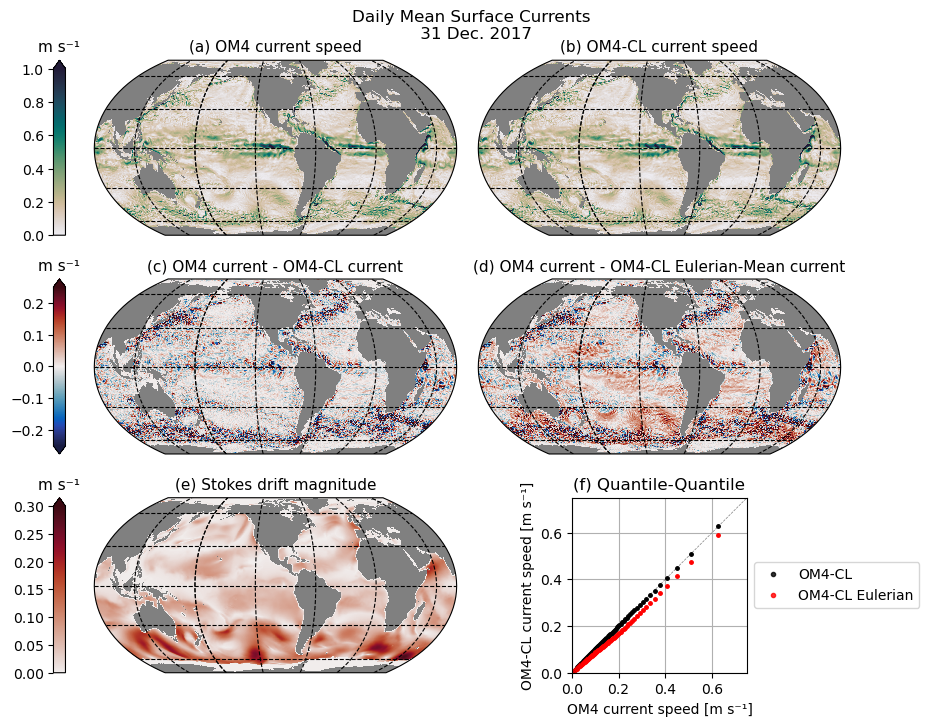

In [25]:
D1=0.55; D2=0.25;

fig=plt.figure(figsize=(12, 7))

projection = ccrs.EqualEarth(central_longitude=-100.0)

ax1 = fig.add_axes([0.06, 3*0.25/4+0.50, D1, D2], projection=projection)
ax2 = fig.add_axes([0.38, 3*0.25/4+0.50, D1, D2], projection=projection)
ax3 = fig.add_axes([0.06, 2*0.25/4+0.25, D1, D2], projection=projection)
ax4 = fig.add_axes([0.38, 2*0.25/4+0.25, D1, D2], projection=projection)
ax5 = fig.add_axes([0.06, 1*0.25/4+0.00, D1, D2], projection=projection)
ax6 = fig.add_axes([0.38, 1*0.25/4+0.00, D1, D2])
ax6.set_aspect('equal')

axcb1 = fig.add_axes([0.15, 0.50+3*0.25/4, 0.01, D2])
axcb2 = fig.add_axes([0.15, 0.25+2*0.25/4, 0.01, D2])
axcb3 = fig.add_axes([0.15, 0.00+1*0.25/4, 0.01, D2])

cmap = cmocean.cm.rain
cmap.set_bad(alpha=0)

ax=ax1
p1 = Snap.OM4_Umag.plot(x='geolon', y='geolat',
                        vmin=0., vmax=1, cmap=cmap,
                        transform=ccrs.PlateCarree(),
                        add_labels=False,
                        add_colorbar=False,
                        ax=ax,
                        shading="auto",
                        rasterized=True,
                        zorder=-20)

ax.set_title('(a) OM4 current speed', fontsize=11)

cb = plt.colorbar(p1, cax=axcb1, orientation='vertical', extend='max')
cb.ax.set_title(r'm s⁻¹', fontsize=11)


ax=ax2
p2 = Snap.OM4CL_Umag.plot(x='geolon', y='geolat',
                          vmin=0., vmax=1, cmap=cmap,
                          transform=ccrs.PlateCarree(),
                          add_labels=False,
                          add_colorbar=False,
                          ax=ax,
                          shading="auto",
                          rasterized=True,
                          zorder=-20)

ax.set_title('(b) OM4-CL current speed', fontsize=11)


ax=ax3

cmap3 = cmocean.cm.balance
cmap3.set_bad(alpha=0)

(Snap.OM4_Umag-Snap.OM4CL_Umag).plot(x='geolon', y='geolat',
                                     vmin=-0.25, vmax=0.25, cmap=cmap3,
                                     transform=ccrs.PlateCarree(),
                                     add_labels=False,
                                     add_colorbar=False,
                                     ax=ax,
                                     shading="auto",
                                     rasterized=True,
                                     zorder=-20)

ax.set_title('(c) OM4 current - OM4-CL current', fontsize=11)


ax=ax4

p3 = (Snap.OM4_Umag-Snap.OM4CL_Umag_Eul).plot(x='geolon', y='geolat',
                                              vmin=-0.25, vmax=0.25, cmap=cmap3,
                                              transform=ccrs.PlateCarree(),
                                              add_labels=False,
                                              add_colorbar=False,
                                              ax=ax,
                                              shading="auto",
                                              rasterized=True,
                                              zorder=-20)

ax.set_title('(d) OM4 current - OM4-CL Eulerian-Mean current', fontsize=11)

cb = plt.colorbar(p3, cax=axcb2, orientation='vertical', extend='both')
cb.ax.set_title(r'm s⁻¹', fontsize=11)


ax=ax5

cmap2 = cmocean.cm.amp
cmap2.set_bad(alpha=0)

p2 = Snap.OM4CL_Umag_Stk.plot(x='geolon', y='geolat',
                              vmin=0., vmax=0.3, cmap=cmap2,
                              transform=ccrs.PlateCarree(),
                              add_labels=False,
                              add_colorbar=False,
                              ax=ax,
                              shading="auto",
                              rasterized=True,
                              zorder=-20)

ax.set_title('(e) Stokes drift magnitude', fontsize=11)

cb = plt.colorbar(p2, cax=axcb3, orientation='vertical', extend='max')
cb.ax.set_title(r'm s⁻¹', fontsize=11)


ax=ax6

ax.plot([-10, 10], [-10, 10], '--', color='gray', linewidth=0.5)
FM1 = 'k.'
FM2 = 'r.'
ax.plot(0, 1e1, FM1, alpha=0.8, label='OM4-CL')
ax.plot(0, 1e1, FM2, alpha=0.8, label='OM4-CL Eulerian')

for q in range(100):    
    ax.plot(np.nanpercentile(Snap.OM4_Umag, q),
            np.nanpercentile(Snap.OM4CL_Umag, q),
            FM1, markersize=5)
    ax.plot(np.nanpercentile(Snap.OM4_Umag, q),
            np.nanpercentile(Snap.OM4CL_Umag_Eul, q),
            FM2, markersize=5)
    
LM = [0, 0.75]
ax.set(xlim=LM, ylim=LM,
       title='(f) Quantile-Quantile',
       xlabel='OM4 current speed [m s⁻¹]',
       ylabel='OM4-CL current speed [m s⁻¹]')
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
ax.grid(True)
ax.set_aspect('equal')

for ax in [ax1, ax2, ax3, ax4, ax5]:
    ax.set_facecolor('grey')
    ax.gridlines(color='black', linestyle='--')

for axcb in [axcb1, axcb2, axcb3]:
    axcb.yaxis.set_ticks_position('left')
    axcb.yaxis.set_label_position('left')

fig.suptitle('Daily Mean Surface Currents \n 31 Dec. 2017', y=1.01)

fig.savefig('./figure_1.pdf', dpi=320,
            bbox_inches='tight', 
            pad_inches=0.02);